In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from collections import defaultdict, Counter
from os import listdir
from razdel import tokenize

In [2]:
# !mkdir clean_files
# !mv files/1* clean_files/
# !mv files/2* clean_files/
# !mv files/3* clean_files/

In [3]:
len(listdir('clean_files'))

8109

In [4]:
def parse_hubs(raw_hubs):
    hub_list = [hub_str.strip().lower() for hub_str in raw_hubs.strip().replace(', ', '').split('\n')]
    return [hub for hub in hub_list if hub]

def get_like_value(like_str):
    if len(like_str) == 1:
        return 1 if like_str == '+' else -1
    if like_str[0] != '+':
        return -int(like_str[1:])
    return int(like_str[1:])

In [5]:
count_by_hub = defaultdict(int)
likes = []
hubs_cnt = []
text_lengthes = []

count_good = 0

for filename in listdir('clean_files'):
    one_file = pickle.load(open(f'clean_files/{filename}', 'rb'))
    file_hubs = parse_hubs(one_file['hubs'])
    for hub in file_hubs:
        count_by_hub[hub] += 1
    hubs_cnt.append(len(file_hubs))
    text_lengthes.append(len(list(tokenize(one_file["text"]))))
    likes.append(get_like_value(one_file['likes']))

In [6]:
one_file

{'id': 411263,
 'status': 'ok',
 'title': '«Волшебная кнопка» для LED на ATtiny4',
 'text': 'СЕЗАМ\nБыл у меня когда-то давно сенсорный чудо-выключатель СЕЗАМ. Очень он мне нравился. Но времена меняются, перестал вписываться в интерьер, а потом и вовсе оказался не рассчитан на работу со всякими модными энергосберегающими лампами. Нравился мне в нём принцип управления. Короткое касание сенсора включало/выключало свет, а длительное регулировало яркость. Кому интересно — сердцем выключателя была микросхема К145АП2, аналог Siemens S576B (К145АП2 до сих пор продаются).\nПод катом мой вариант эмуляции работы этой микросхемы.\nНе так давно соорудил я себе над столом подсветку из светодиодной ленты в алюминиевом профиле с рассеивателем и встал вопрос о выключателе. Ставить готовое как то громоздко. Чтоб на проводе болталось — не красиво, обычный выключатель ставить — портит вид, да и особо некуда.\nРешил я встроить выключатель, а за одно и регулятор яркости, в торец ДСП 16мм. Сделать его сенсо

In [7]:
print(len(text_lengthes))

8109


In [8]:
print("Количество текстов:", len(listdir('clean_files')))
print("Средняя длинна текста в токенах:", round(np.mean(text_lengthes), 2))
print()
print("Среднее количество лайков:", np.mean(likes))
print("Медиана лайков:", np.median(likes))
print("Медиана тегов:", np.median(hubs_cnt))

Количество текстов: 8109
Средняя длинна текста в токенах: 1584.8

Среднее количество лайков: 18.8178567024294
Медиана лайков: 13.0
Медиана тегов: 2.0


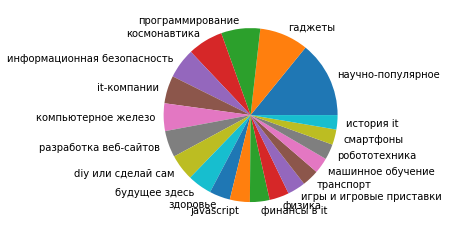

In [9]:
top_categories = sorted([(count, hub) for hub, count in count_by_hub.items()], reverse=True)[:20]

values = [x[0] for x in top_categories]
labels = [x[1] for x in top_categories]

plt.pie(values, labels=labels)
plt.plot()

print()

In [10]:
print(top_categories)

[(953, 'научно-популярное'), (613, 'гаджеты'), (490, 'программирование'), (443, 'космонавтика'), (379, 'информационная безопасность'), (348, 'it-компании'), (346, 'компьютерное железо'), (333, 'разработка веб-сайтов'), (329, 'diy или сделай сам'), (305, 'будущее здесь'), (260, 'здоровье'), (251, 'javascript'), (247, 'финансы в it'), (246, 'физика'), (226, 'игры и игровые приставки'), (212, 'транспорт'), (197, 'машинное обучение'), (195, 'робототехника'), (192, 'смартфоны'), (180, 'история it')]


In [11]:
good_categories = list(map(lambda x: x[1],top_categories[:10]))
print(good_categories)

['научно-популярное', 'гаджеты', 'программирование', 'космонавтика', 'информационная безопасность', 'it-компании', 'компьютерное железо', 'разработка веб-сайтов', 'diy или сделай сам', 'будущее здесь']


In [12]:
good_count = 0

for filename in listdir('clean_files'):
    one_file = pickle.load(open(f'clean_files/{filename}', 'rb'))
    file_hubs = parse_hubs(one_file['hubs'])
    good_count += any(hub in good_categories for hub in file_hubs)
print(good_count)

3685


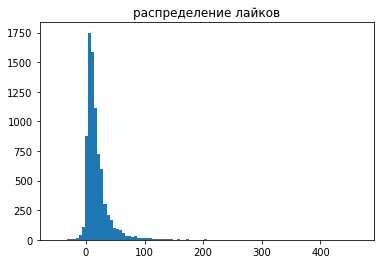

In [13]:
plt.hist(likes, bins=100)
plt.title("распределение лайков")
print()

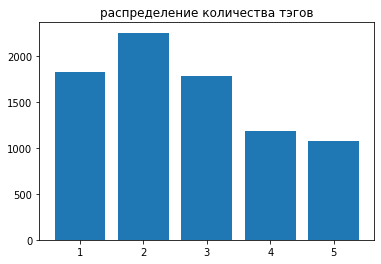

In [14]:
cnt = Counter(hubs_cnt)
hubs_groups = cnt.items()

labels = [x[0] for x in hubs_groups]
values = [x[1] for x in hubs_groups]

plt.bar(labels, values)
plt.title("распределение количества тэгов")
print()